# Lógica para Computação: Dedução Natural da Lógica de Primeira-Ordem no Estilo de Fitch
> *Autores: Davi Romero de Vasconcelos, daviromero@ufc.br e Maria Viviane Menezes, vivianemenezes@ufc.br
>
> Universidade Federal do Ceará, Campus de Quixadá, Março de 2022. (Última atualização 20/03/2022)

Este material foi preparado para a disciplina de Lógica para Computação com a finalidade de apresentar os conceitos básicos do sistema de Dedução Natural no Estilo de Fitch. Alguns conceitos serão apresentados na Linguagem de Programação Python. Para cada seção é apresentado um link (no título da seção) com um vídeo explicando o conteúdo a ser abordado. Uma Playlist com todo o conteúdo de Dedução Natural no Estilo de Fitch está disponível no [YouTube](https://youtube.com/playlist?list=PLfOnKvd6pFiogX1TEA5ZTzZLoC9H-hx9R).








       

In [1]:
#@title Implementação em Python do NADIA (Natural DeductIon proof Assistant)
#@markdown > **Importante:** 
#@markdown - Os átomos e os predicados são escritos em letras maiúsculas (e.g. `A, B, H(x)`).
#@markdown - As variáveis são escritas com a primeira letra em minúsculo, podendo ser seguida de letras e números (e.g. `x, x0, xP0`);
#@markdown - As fórmulas com o $\forall x$ e $\exists x$ serão representadas por `Ax` e `Ex` (`A` e `E` seguidos da variável `x`). Por exemplo, `Ax (H(x)->M(x))` representa $\forall x~(H(x)\rightarrow M(x))$.
#@markdown - A ordem de precedência dos quantificadores e dos conectivos lógicos é definida por $\lnot,\forall,\exists,\wedge,\vee,\rightarrow$ com alinhamento à direita. Por exemplo: A fórmula `~A&B->C` representa a fórmula $(((\lnot A)\land B)\rightarrow C)$.
#@markdown - No NADIA, as palavras premissa e hipótese são representadas por pre e hip, respectivamente.
#@markdown 
#@markdown Não é necessário conhecer o código aqui implementado ou mesmo ter um conhecimento profundo da linguagem Python. Basta acompanhar os exemplos e experimentar construir suas próprias demonstrações.
#@markdown >*Execute esta célula (`ctrl+enter` ou clicando no botão ao lado) para que o ambiente seja carregado com as classes implementadas.*


!pip install nadia-proof
!pip install logic4py
from nadia.nadia_pt_gui import nadia, nadia_theorem
from logic4py.logic_gui import verify_bound_variables, verify_free_variables, verify_substitution, verify_variables, verify_reasoning, is_substitutable 
from logic4py.example_theorems import THEOREMS as lTheorems
from random import randrange

## [Dedução Natural no Estilo de Fitch](https://youtu.be/omOIEsX3z5U)
O sistema de Dedução Natural é um mecanismo que permite a construção de uma prova formal, estabelecendo uma conclusão $\varphi$ a partir de um conjunto de premissas $\Gamma = \{\varphi_1, \varphi_2, \cdots, \varphi_n \}$,  denotado por $\Gamma\vdash\varphi$, aplicando-se sucessivamente **regras de demonstração**. 

Em Dedução Natural no estilo de Fitch, as demonstrações são apresentadas de forma linear e sequencial, na qual cada uma das linhas da prova é numerada, tem uma afirmação e uma justificativa. As justificativas são definidas por serem *premissas* da prova ou pela aplicação de uma das *regras do sistema dedutível*. As subprovas dentro de uma prova maior têm *caixas* ao redor e servem para delimitar o escopo de hipóteses temporárias. Provas podem ter caixas dentro de caixas, ou pode-se abrir outras caixas depois de fechar outras, obedecendo as regras de demonstração. Uma fórmula só pode ser utilizada em uma prova em um determinado ponto se essa fórmula aconteceu anteriormente e se nenhuma caixa que contenha essa ocorrência da fórmula tenha sido fechada.

A seguir iremos apresentar todas as regras do sistema de Dedução Natural no Estilo de Fitch.


### [Regra das Premissas](https://youtu.be/7ELxnpwns5s)

O primeiro passo em uma demonstração em Dedução Natural no estilo *Fitch* é enumerar as premissas da prova. A Figura 1 apresenta a estrutura geral da regra das premissas, na qual $\varphi_1,\varphi_2,\ldots,\varphi_n$ são representadas em uma linha cada, seguindo uma numeração sequencial e como justificativa "premissa".

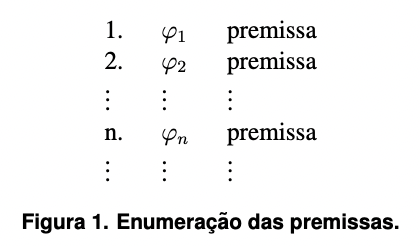

### [Regras da Conjunção](https://youtu.be/V9T1MVU4EgE)

A regra da **introdução da conjunção ($\wedge i$)** é apresentada na Figura 2a (ou Figura 2b), na qual a fórmula $\varphi\wedge\psi$ pode ser concluída em uma linha $p$ se $\varphi$ e $\psi$ foram demonstradas nas linhas $m$ (ou $n$) e $n$ (ou $m$), respectivamente, anteriores a linha $p$ e que não foram descartadas. A Figura 2c exibe a aplicação $\wedge i$ da fórmula $A\wedge B$ na linha $3$ a partir das fórmulas $A$ e $B$, definidas nas linhas $1$ e $2$, respectivamente, que são anteriores a linha $3$. 

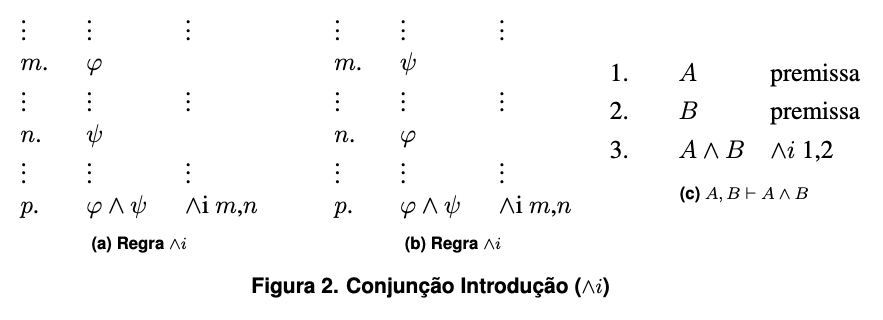

In [2]:
#@title NADIA - Exemplo: $A,B\vdash A\land B$ 
#@markdown Execute essa célula para gerar o seu exercício.
nadia('''''', height_layout='70px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='', layout=Layout(height='70px', width='90%'), placeholder='Digite sua demonstração:')

Output()

A regra da **eliminação da conjunção ($\wedge e$)** é apresentada na Figura 3a (ou Figura 3b), na qual a fórmula $\varphi$ (ou $\psi$) pode ser concluída na linha $m$ a partir da eliminação à esquerda (ou à direita) da conjunção da fórmula $\varphi\wedge\psi$ da linha $n$ (anterior a $p$ e não foi descartada). A Figura 3c exibe uma aplicação da regra na qual $A$ é obtida na linha $3$ pela eliminação da conjunção à esquerda da fórmula $A\wedge B$ da linha $1$.

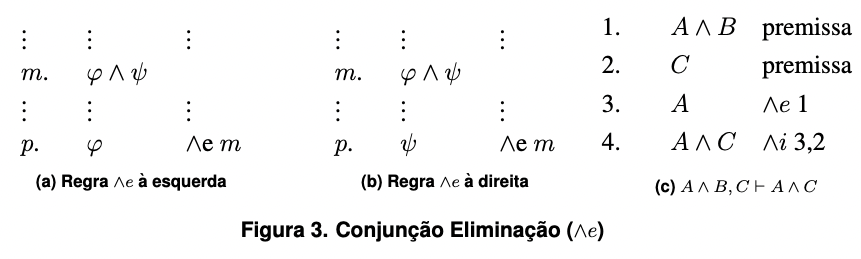

In [3]:
#@title NADIA - Exemplo: $A\land B,C\vdash A\land C$ 
#@markdown Execute essa célula para gerar o seu exercício.
nadia('''''', height_layout='75px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='', layout=Layout(height='75px', width='90%'), placeholder='Digite sua demonstração:')

Output()

### [Regras da Implicação](https://youtu.be/H-Q9DGSh2lw)
A regra da **eliminação da implicação ($\rightarrow e$)**, também conhecida como *Modus Ponens*, é apresentada na Figura 4a (ou Figura 4b), na qual a fórmula  $\psi$ pode ser concluída na linha $p$ a partir da eliminação da implicação da fórmula $\varphi\rightarrow\psi$ da linha $m$ (ou $n$) e $\varphi$ da linha $n$ (ou $m$), anteriores a $p$ e não descartadas. A Figura 4c exibe uma aplicação da regra na qual a fórmula $C$ é obtida na linha $4$ pela eliminação da implicação das fórmulas $B$ e $B\rightarrow C$ das linha $3$ e $2$, respectivamente.

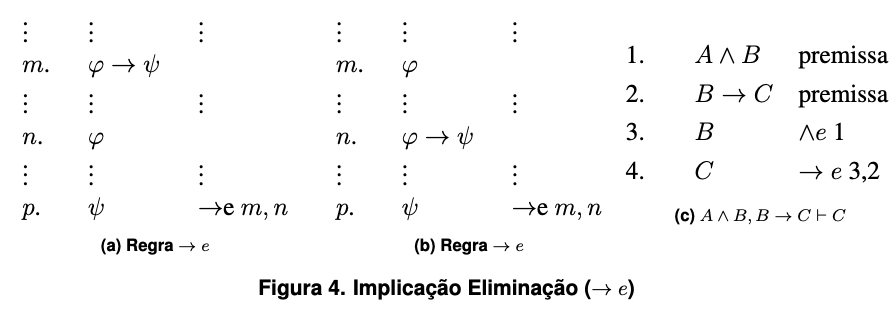

In [4]:
#@title NADIA - Exemplo: $A\land B,B\rightarrow C\vdash C$ 
#@markdown Execute essa célula para gerar o seu exercício.
nadia('''''', height_layout='75px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='', layout=Layout(height='75px', width='90%'), placeholder='Digite sua demonstração:')

Output()

A regra da **introdução da implicação ($\rightarrow i$)** constrói condicionais que não ocorrem como premissas. Para construção de um condicional é necessário realizar *raciocínio hipotético*, isto é, supor *temporariamente* que uma dada fórmula é verdadeira. Chamamos esta fórmula de *hipótese*. Assim, utilizamos *caixas de demonstração*, que servem para delimitar o *escopo da hipótese temporária*. Observe na Figura 5a que para provar o condicional $\varphi \rightarrow \psi$ na linha $n+1$, colocamos $\varphi$ como \textit{hipótese} no topo de uma caixa (linha $m$), aplicamos um número finito de regras de forma a obter $\psi$ na linha $n$. Todo o raciocínio para obter $\psi$ depende da veracidade de $\varphi$ e, por isso, as fórmulas resultante deste raciocínio ficam delimitadas na caixa. Na linha seguinte ($n+1$) podemos aplicar a regra $\rightarrow i$ para obter $\varphi \rightarrow \psi$, sendo que este condicional não mais depende da hipótese $\varphi$. Na justificativa da linha $n+1$ utilizamos o nome da regra seguido das linhas inicial e final da caixa ($\rightarrow i$ $\,m$-$n$). 
A Figura 5b exibe uma aplicação da regra na qual a fórmula $A \rightarrow C$ é obtida na linha $6$ a partir da caixa das linhas $3$ a $5$ em que $A$ é a hipótese. 

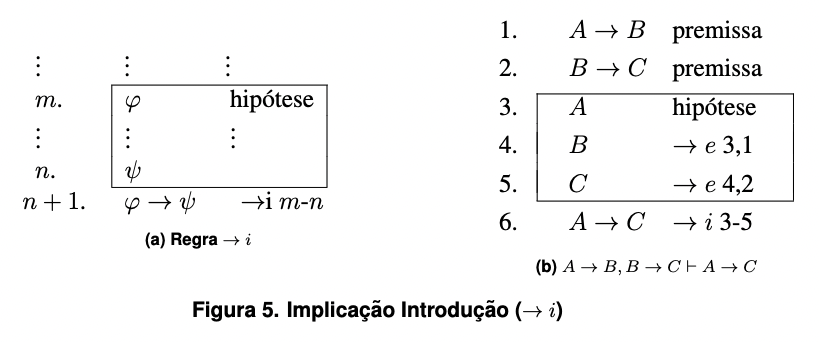

Observe que  para a obtenção de $\psi$ é possível utilizar quaisquer outras fórmulas como premissas e conclusões provisórias feitas até então. Demonstrações podem ter caixas dentro de caixas, ou pode-se abrir novas caixas depois de fechar outras. No entanto, existem regras sobre quais fórmulas podem ser utilizadas em que ponto na demonstração. Em geral, só podemos usar uma fórmula em um determinado ponto se esta fórmula ocorre *antes* desse ponto e se nenhuma caixa que contenha a ocorrência desta fórmula tenha sido fechada. 


In [5]:
#@title NADIA - Exemplo: $A\rightarrow C,B\rightarrow C\vdash A\rightarrow C$ 
#@markdown Execute essa célula para gerar o seu exercício.
nadia('''''', height_layout='115px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='', layout=Layout(height='115px', width='90%'), placeholder='Digite sua demonstração:')

Output()

### [Regras da Disjunção](https://youtu.be/GIhtuCewlIA)

A regra da **introdução da disjunção ($\lor i$)** é a apresentada na Figura 6a (ou Figura 6b), na qual dizemos que temos $\varphi\lor\psi$ em uma linha $p$ se $\varphi$ (ou $\psi$) ocorre em uma linha $m$ anterior a $p$ e que não foi descartada. A Figura 6c ilustra a aplicação da introdução da disjunção na linha $3$ com a introdução de $A\lor B$ a partir da fórmula $A$ definida na linha $2$.

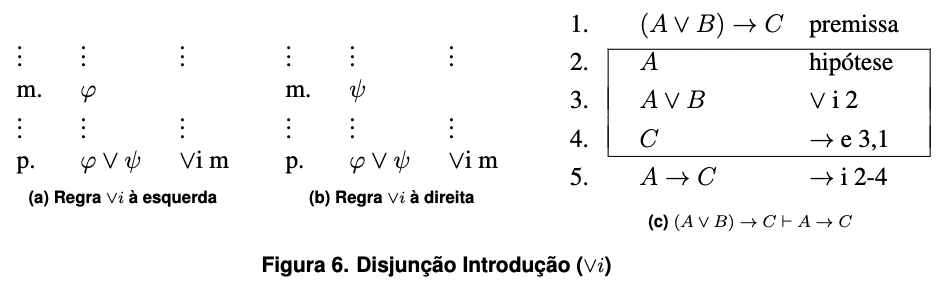

In [6]:
#@title NADIA - Exemplo: $(A\lor B)\rightarrow C\vdash A\rightarrow C$ 
#@markdown Execute essa célula para gerar o seu exercício.
nadia('''''', height_layout='95px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='', layout=Layout(height='95px', width='90%'), placeholder='Digite sua demonstração:')

Output()

A regra da **disjunção eliminação ($\lor e$)** é a apresentada na Figura 7a , na qual dizemos que podemos concluir uma fórmula $\alpha$ na linha $p+1$ se eliminarmos a disjunção da fórmula $\varphi\lor\psi$ na linha $m$ e se fizermos a suposição de $\varphi$ em uma caixa, na linha $m$, e a suposição de $\psi$ em outra caixa, na linha $n+1$, tal que ambas as caixas tenham como conclusão $\alpha$, nas linhas $n$ e $p$, respectivamente, por meio de uma sequência finita de passos (regras). Note que essa regra se assemelha a introdução da implicação no sentido de que fazemos raciocínio hipotético, nas caixas de $(m+1)-n$ e $(n+1)-p$. A Figura 7b ilustra a aplicação da eliminação da disjunção na linha $8$, na qual concluímos $C$, a partir da disjunção de $A\lor B$ na linha $3$ e das caixas $4-5$ e $6-7$ onde supomos $A$ na linha $4$ e concluímos $C$ na linha $5$ e supomos $B$ na linha $6$ e concluímos $C$ na linha $7$. 

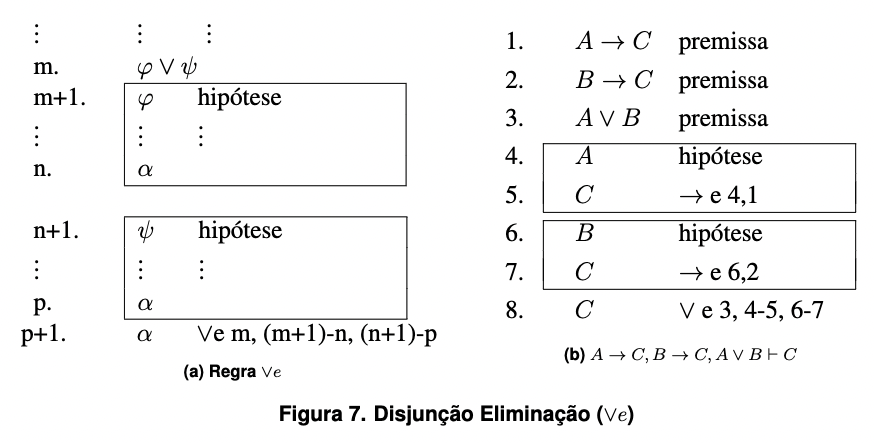

In [7]:
#@title NADIA - Exemplo: $A\rightarrow C, B\rightarrow C, (A\lor B)\vdash C$ 
#@markdown Execute essa célula para gerar o seu exercício.
nadia('''''', height_layout='140px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='', layout=Layout(height='140px', width='90%'), placeholder='Digite sua demonstração:')

Output()

### [Regras da Negação](https://youtu.be/9PQkFIEFwXQ)

A regra da **negação eliminação ($\lnot$e)** envolve a noção de *contradição*. Contradições são expressões da forma $\varphi \wedge \lnot \varphi$ ou $\neg \varphi \wedge \varphi$ onde $\varphi$ é qualquer fórmula da lógica proposicional. A fórmula $\bot$ é utilizada para denotar uma contradição e este fato é expresso na regra $\lnot e$. Na Figura 8a (ou Figura 8b) temos a fórmula $\varphi$ na linha $m$ (ou $n$) e a sua negação $\lnot \varphi$ na linha $n$ (ou $m$) sendo combinadas para aparecimento da contradição $\bot$ na linha $p$ com a aplicação da regra $\neg e$. A Figura 8c exibe uma aplicação da regra na qual a contradição $\bot$ é obtida na linha $3$ devido às fórmulas $A$ na linha $1$ e $\lnot A$ na linha $2$.

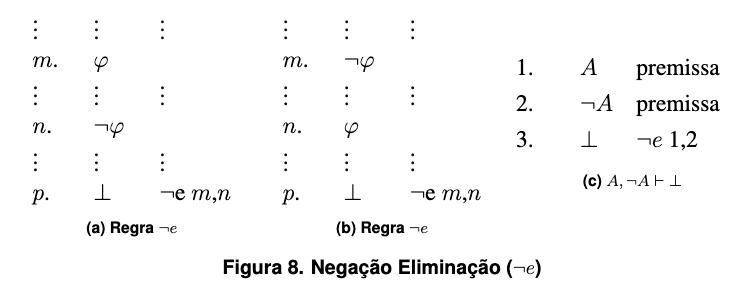

In [8]:
#@title NADIA - Exemplo: $A,\lnot A\vdash \bot$ 
#@markdown Execute essa célula para gerar o seu exercício.
nadia('''''', height_layout='70px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='', layout=Layout(height='70px', width='90%'), placeholder='Digite sua demonstração:')

Output()

A regra da **negação introdução ($\lnot i$)** é a apresentada na Figura 9a. Esta é uma regra que envolve raciocínio hipotético e contradição. Se tomarmos $\varphi$ como hipótese (linha $m$) e, após a aplicação de um número finito de regras, chegarmos a  uma contradição $\bot$ na linha $n$, significa que a hipótese não pode ser verdadeira. Desse modo, finalizamos nosso raciocínio hipotético introduzindo a negação na hipótese e obtendo $\lnot \varphi$ na linha $n+1$. A Figura 9b mostra um exemplo da aplicação da regra $\neg i$ em para provamos $\lnot A$ na linha $5$, assumimos $A$ como hipótese no topo da caixa na linha $2$ e chegamos a uma contradição no final da caixa na linha $4$. 

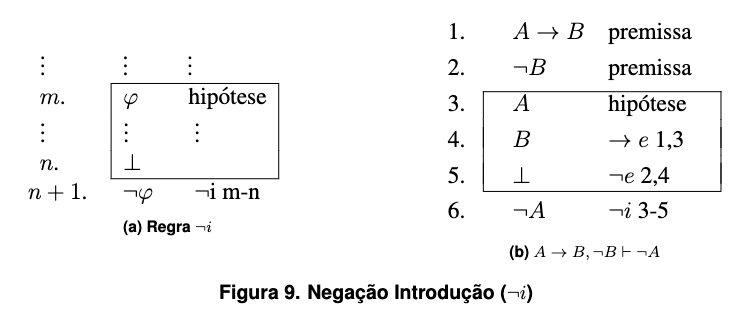


In [9]:
#@title NADIA - Exemplo: $A\rightarrow B, \lnot B\vdash \lnot A$ 
#@markdown Execute essa célula para gerar o seu exercício.
nadia('''''', height_layout='110px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='', layout=Layout(height='110px', width='90%'), placeholder='Digite sua demonstração:')

Output()

### [Regra da Contradição](https://youtu.be/rVGQNuba5Kw)
A **regra da contradição eliminação** é exibida na Figura 10a, na qual podemos concluir uma fórmula qualquer $\psi$ na linha $n$ se demonstramos em uma linha $m$, anterior a $n$, a contradição. A Figura 10b apresenta a demonstração de $B$ na linha $4$ a partir da eliminação da contradição $\bot$ da linha $3$.

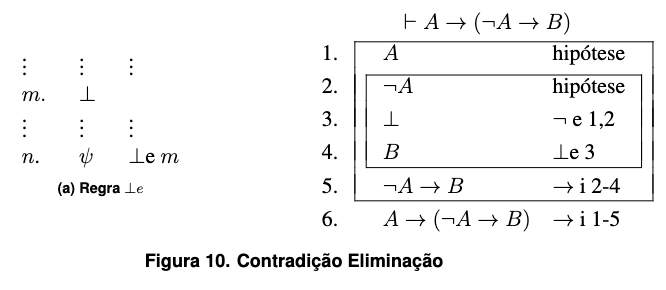

In [10]:
#@title NADIA - Exemplo: $\vdash A\rightarrow(\lnot A\rightarrow B)$ 
#@markdown Execute essa célula para gerar o seu exercício.
nadia('''''', height_layout='145px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='', layout=Layout(height='145px', width='90%'), placeholder='Digite sua demonstração:')

Output()

### [Regra de Redução ao Absurdo](https://youtu.be/goH-MRU8ZKU)

A regra de **redução ao absurdo** é apresenta na Figura 11a, na qual para provarmos uma fórmula $\varphi$ em uma linha $n+1$, iremos supor temporariamente a negação da fórmula, $\lnot\varphi$, em uma caixa que inicia na linha $m$ e que conclui a contradição, $\bot$, na linha $n$, após uma sequência de aplicações de regras. A Figura 11b exibe a demonstração de $A\lor\lnot A$, também conhecido como terceiro-excluído. Para provarmos $A\lor\lnot A$ na linha $8$, fazemos a suposição de $\lnot(A\lor\lnot A)$, na linha $1$ (início da caixa) e concluímos a contradição $\bot$, na linha $7$ (fim da caixa). 

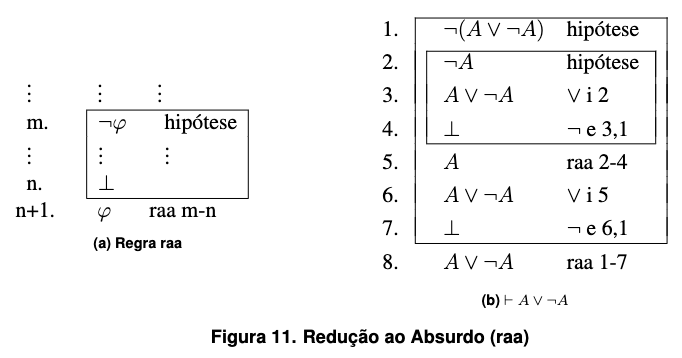

In [11]:
#@title NADIA - Exemplo: $\vdash A\lor\lnot A$ 
#@markdown Execute essa célula para gerar o seu exercício.
nadia('''''', height_layout='175px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='', layout=Layout(height='175px', width='90%'), placeholder='Digite sua demonstração:')

Output()

### [Regra do Copie](https://youtu.be/UBovSgAszvM)

A regra do **copie**, apresentada na Figura 12a, é necessária, no estilo de Fitch, para permitir concluir uma caixa com uma fórmula que já apareceu anteriormente na demonstração. Por exemplo, para demonstrar $A\rightarrow B$, veja Figura 12b, na linha $10$, é preciso que a caixa que justifica a introdução da implicação inicie com $A$, linha $8$, e termine com $B$, linha $9$. Ocorre que a justificativa de $B$ já havia sido realizada e, portanto, a justificativa da linha $9$ é a cópia da fórmula da linhas $7$.

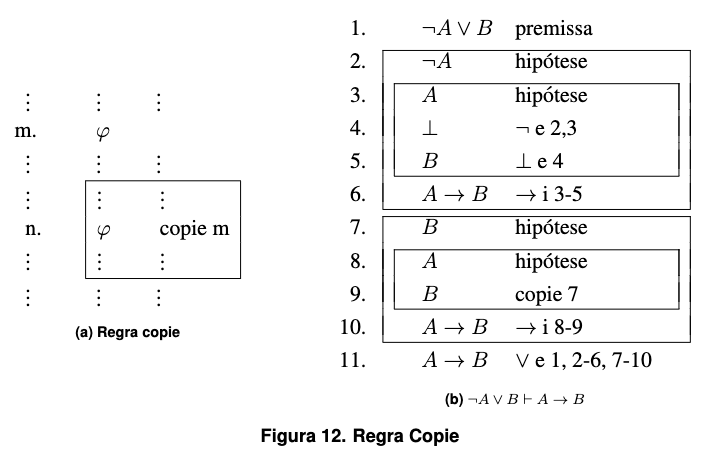

In [12]:
#@title NADIA - Exemplo: $\lnot A\lor B\vdash A\rightarrow B$ 
#@markdown Execute essa célula para gerar o seu exercício.
nadia('''''', height_layout='260px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='', layout=Layout(height='260px', width='90%'), placeholder='Digite sua demonstração:')

Output()

## Regras da Lógica de Primeira-Ordem

Para definir as regras de introdução e eliminação dos quantificadores, precisamos entender os conceitos de substituição de uma variável por um termo em uma fórmula e se uma variável é substituível por um termo em uma fórmula. A seguir, iremos apresentar alguns exercícios para recapitular esses conceitos.

In [13]:
#@title Exercício 1 (Substituição):
#@markdown Execute essa célula para gerar o seu exercício.
verify_substitution('', input_formula='Ay (P(x,y)->M(x))', input_var='x', input_term='a')

**Digite a fórmula que é resultado da substituição da variável x pelo termo a na fórmula Ay (P(x,y)->M(x)):**

Text(value='', layout=Layout(width='90%'), placeholder='Digite sua fórmula:')

Output()

In [14]:
#@title Exercício 2 (Substituição):
#@markdown Execute essa célula para gerar o seu exercício.
verify_substitution('', input_formula='Ay (P(x,y)->M(x))', input_var='x', input_term='y')

**Digite a fórmula que é resultado da substituição da variável x pelo termo y na fórmula Ay (P(x,y)->M(x)):**

Text(value='', layout=Layout(width='90%'), placeholder='Digite sua fórmula:')

Output()

In [15]:
#@title Exercício 1 (Substituição):
#@markdown Execute essa célula para gerar o seu exercício.
verify_substitution('', input_formula='Ay (P(x,y)->M(x))', input_var='x', input_term='a')

**Digite a fórmula que é resultado da substituição da variável x pelo termo a na fórmula Ay (P(x,y)->M(x)):**

Text(value='', layout=Layout(width='90%'), placeholder='Digite sua fórmula:')

Output()

In [16]:
#@title Exercício 2 (Substituição):
#@markdown Execute essa célula para gerar o seu exercício.
verify_substitution('', input_formula='Ay (P(x,y)->M(x))', input_var='x', input_term='y')

**Digite a fórmula que é resultado da substituição da variável x pelo termo y na fórmula Ay (P(x,y)->M(x)):**

Text(value='', layout=Layout(width='90%'), placeholder='Digite sua fórmula:')

Output()

In [17]:
#@title Exercício 3 (Substituição):
#@markdown Execute essa célula para gerar o seu exercício.
verify_substitution('', input_formula='Ay (P(x,y)->Ax M(x))', input_var='x', input_term='a')

**Digite a fórmula que é resultado da substituição da variável x pelo termo a na fórmula Ay (P(x,y)->Ax M(x)):**

Text(value='', layout=Layout(width='90%'), placeholder='Digite sua fórmula:')

Output()

In [18]:
#@title Exercício 4 (Substituível):
#@markdown Execute essa célula para gerar o seu exercício.
is_substitutable(input_formula='Ay P(x,y)', input_var ='x', input_term='a')

**A variável x é substituível pelo termo a na fórmula Ay P(x,y):**

RadioButtons(description='Resposta:', options=('Sim', 'Não'), value=None)

Output()

In [19]:
#@title Exercício 5 (Substituível):
#@markdown Execute essa célula para gerar o seu exercício.
is_substitutable(input_formula='Ay P(x,y)', input_var ='x', input_term='y')

**A variável x é substituível pelo termo y na fórmula Ay P(x,y):**

RadioButtons(description='Resposta:', options=('Sim', 'Não'), value=None)

Output()

### Regras do Universal
A regra da **eliminação do universal ($\forall e$)** é apresentada abaixo, na qual a fórmula $\varphi(t)$ pode ser concluída em uma linha $p$ se $\forall x\varphi(x)$ foi demonstrada na linha $m$, desde que a variável $x$ seja substituível pelo termo $t$ em $\varphi$. A Figura abaixo exibe a aplicação $\forall e$ da fórmula $H(s)\rightarrow M(s)$ na linha $3$ a partir da fórmula $\forall x (H(x)\rightarrow M(x))$, definida na linha $1$. 

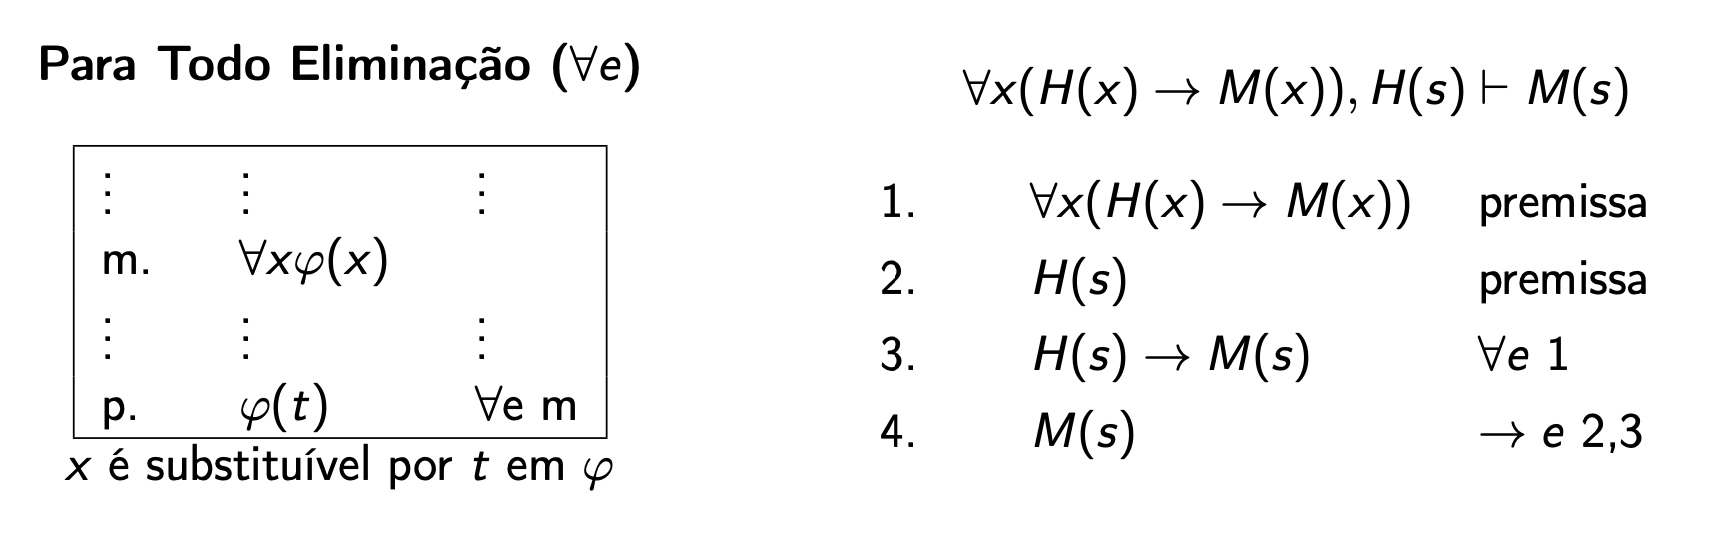

In [20]:
#@title NADIA - Exemplo: $\forall x (H(x)\rightarrow M(x)),H(s)\vdash M(s)$
#@markdown Execute essa célula para gerar o seu exercício.
nadia('''1. Ax(H(x)->M(x))   pre
2. H(s)             pre
3. H(s)->M(s)       Ae 1
4. M(s)             ->e 2,3''', height_layout='70px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='1. Ax(H(x)->M(x))   pre\n2. H(s)             pre\n3. H(s)->M(s)       Ae 1\n4. M(s)           …

Output()

A regra da **introdução do universal ($\forall i$)** é apresentada abaixo, na qual para provarmos $\forall x\varphi(x)$, na linha $n+1$, iremos supor que para uma variável $a$ qualquer (arbitrária) em uma caixa que inicia na linha $m$ e que conclui $\varphi(a)$, na linha $n$. Dizemos que a variável $a$ é qualquer se ela é uma variável nova na linha $m$, ou seja, $a$ não ocorre como variável livre de qualquer fórmula que acontença anteriormente a linha $m$ que não esteja em uma caixa fechada.  
Na Figura abaixo, ilustramos a introdução do universal na linha $7$ para provar $\forall x M(x)$ a partir da suposição de $a$, no início da caixa, na linha $3$, e demonstramos $M(a)$ ao final da caixa, na linha $6$. Note que a variável $a$ escolhida não é uma variável livre das fórmulas das linhas $1$ e $2$.

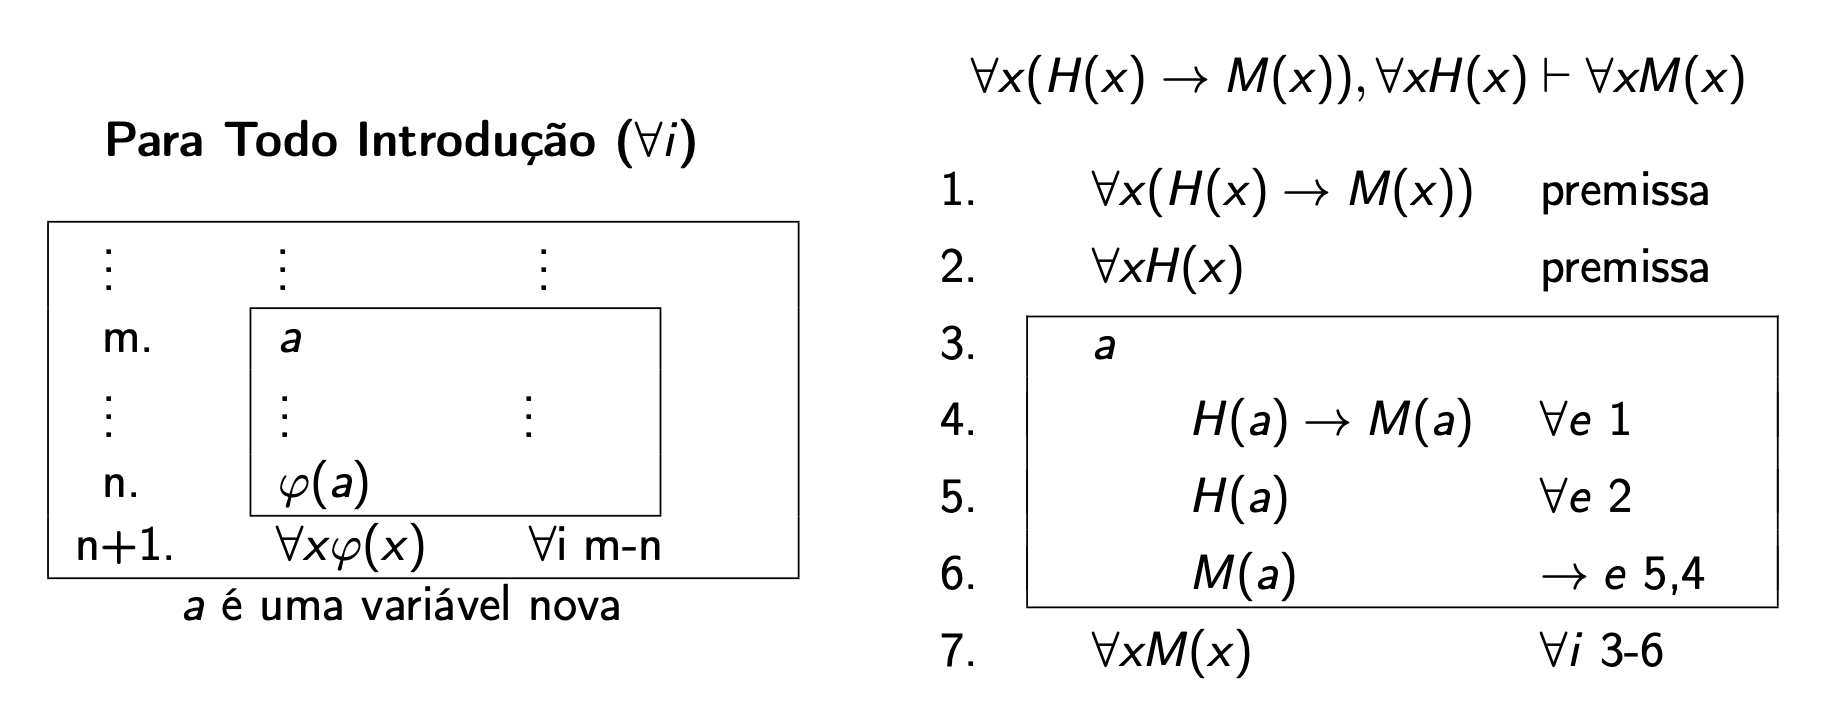

In [21]:
#@title NADIA - Exemplo: $\forall x (H(x)\rightarrow M(x)),\forall x H(x)\vdash \forall x M(x)$
#@markdown Execute essa célula para gerar o seu exercício.
nadia('''1. Ax(H(x)->M(x))        pre
2. Ax H(x)               pre
3. { a
4.      H(a)->M(a)       Ae 1
5.      H(a)             Ae 2
6.      M(a)             ->e 4,5
   }
7. Ax M(x)               Ai 3-6''', height_layout='130px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='1. Ax(H(x)->M(x))        pre\n2. Ax H(x)               pre\n3. { a\n4.      H(a)->M(a)       A…

Output()

### Regras do Existencial
A regra da **introdução do existencial ($\exists i$)** é apresentada abaixo, na qual a fórmula $\exists x\varphi(x)$ pode ser concluída em uma linha $p$ se $\varphi(t)$ foi demonstrada na linha $m$, desde que a variável $x$ seja substituível pelo termo $t$ em $\varphi$. A Figura abaixo exibe a aplicação $\exists i$ da fórmula $\exists x P(x)$ na linha $3$ a partir da fórmula $P(a)$, definida na linha $1$. 

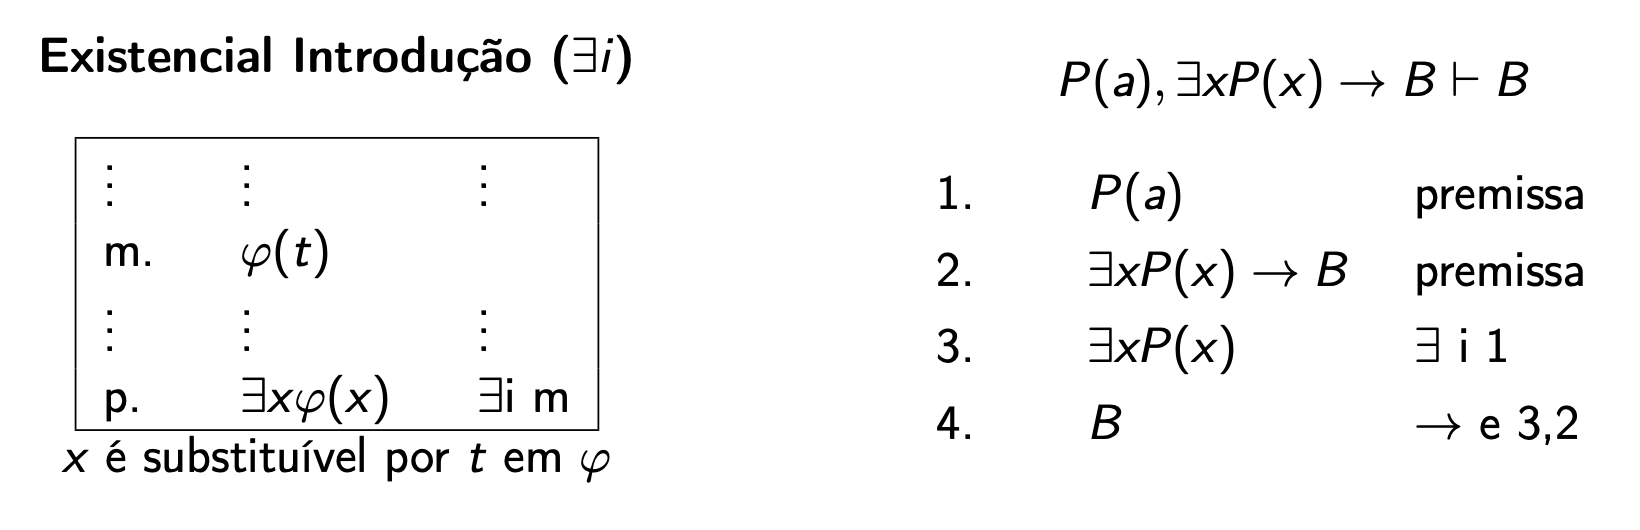

In [22]:
#@title NADIA - Exemplo: $P(a), \exists x P(x)\rightarrow B\vdash B$
#@markdown Execute essa célula para gerar o seu exercício.
nadia('''1. P(a)              pre
2. Ex P(x) -> B      pre
3. Ex P(x)           Ei 1
4. B                 ->e 3,2''', height_layout='70px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='1. P(a)              pre\n2. Ex P(x) -> B      pre\n3. Ex P(x)           Ei 1\n4. B           …

Output()

A regra da **eliminação do existencial ($\exists e$)** é apresentada abaixo, na qual para provarmos uma fórmula $\alpha$, na linha $p+1$, iremos eliminar o existencial da fórmula $\exists x \varphi(x)$, na linha $m$, supondo a fórmula $\varphi(a)$ para alguma variável $a$ em uma caixa que inicia na linha $n$ e que concluiu com uma fórmula $\alpha$ ao final da caixa, na linha $p$, desde que $a$ não ocorra na conclusão $\alpha$. Nesta regra sabemos que a fórmula $\varphi$ vale para algum elemento. Entretanto, não podemos assumir nenhuma propriedade específica para esta variável. Assim, a variável $a$ deve ser uma variável nova na linha $n$, ou seja, $a$ não ocorre como variável livre de qualquer fórmula que acontença anteriormente a linha $n$ que não esteja em uma caixa fechada e nem pode estar na conclusão $\alpha$ da regra.  
Na Figura abaixo, ilustramos a eliminação do existencial para concluir $\bot$ na linha $9$, a partir da fórmula $\exists x H(x)$, na linha $3$, e pela caixa que inicia na linha $4$ com a suposição da fórmula $H(a)$ com a (nova) variável $a$ e que termina a caixa na linha $8$ com a conclusão $\bot$.


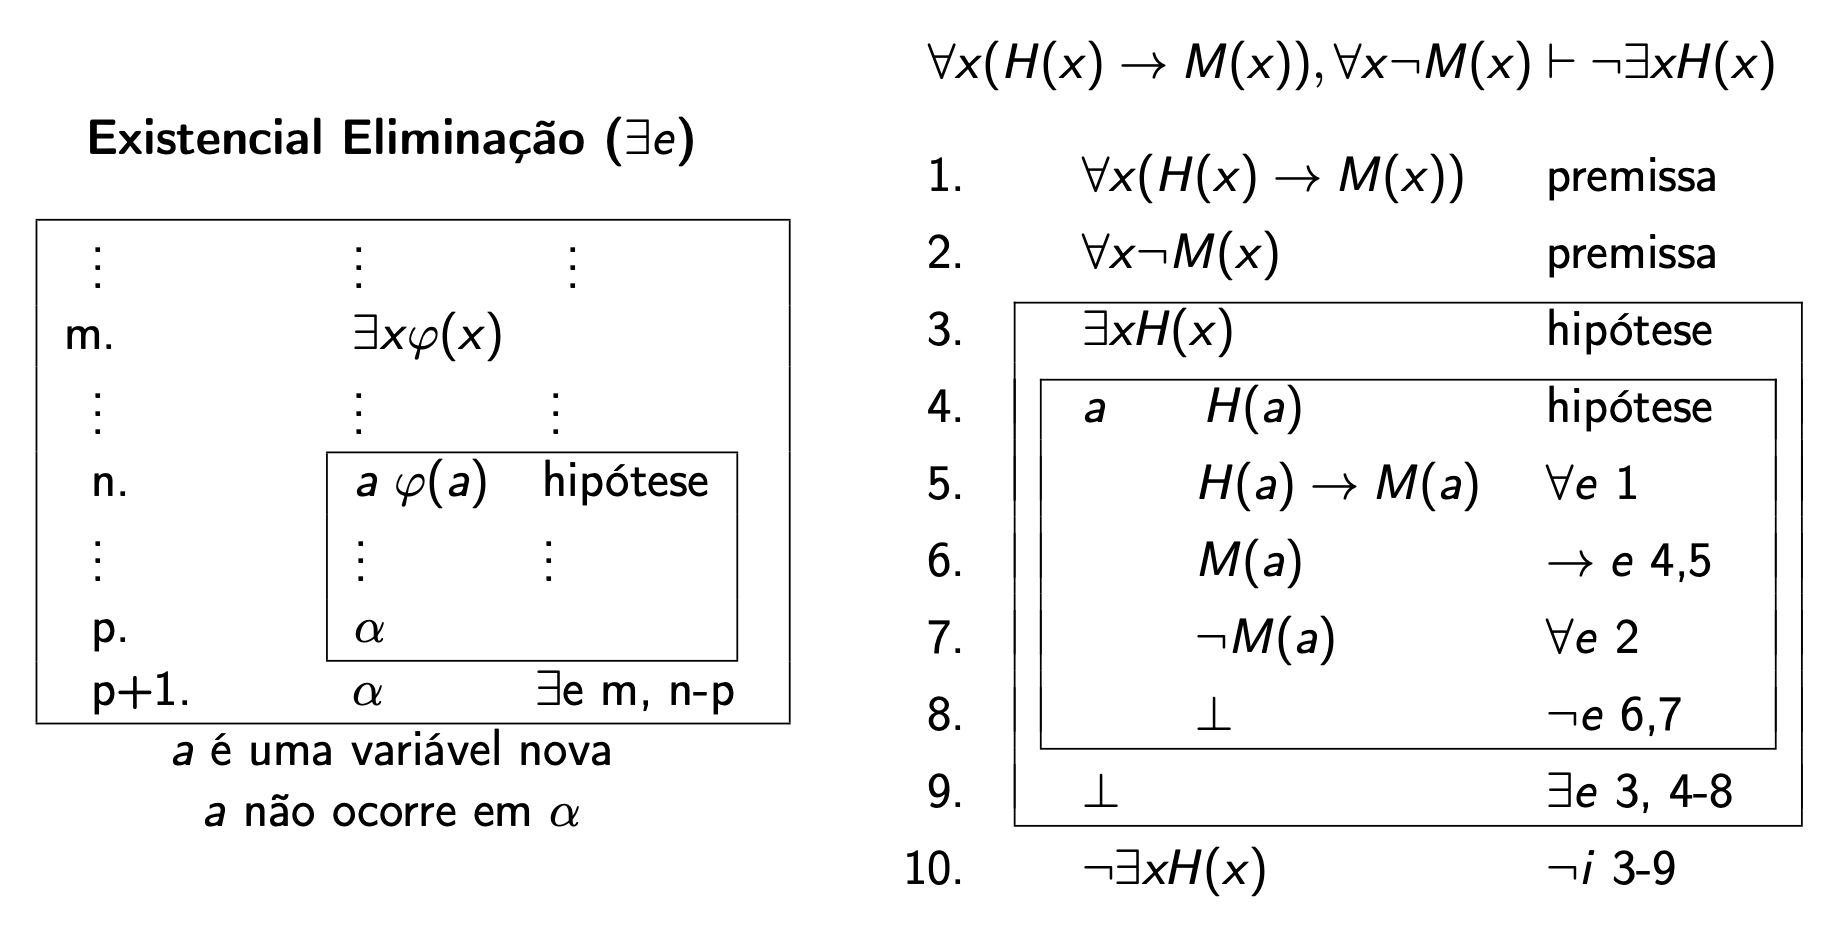

In [23]:
#@title NADIA - Exemplo: $\forall x (H(x)\rightarrow M(x)),\forall x\lnot M(x)\vdash \lnot\exists x H(x)$
#@markdown Execute essa célula para gerar o seu exercício.
nadia('''1. Ax(H(x)->M(x))         pre
2. Ax ~M(x)               pre
3. {  Ex H(x)             hip
4.    { a   H(a)          hip
5.          H(a)->M(a)    Ae 1
6.          M(a)          ->e 4,5
7.          ~M(a)         Ae 2
8.          @             ~e 6,7
      }
9.    @                   Ee 3, 4-8
   }
10.~Ex H(x)              ~i 3-9''', height_layout='190px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='1. Ax(H(x)->M(x))         pre\n2. Ax ~M(x)               pre\n3. {  Ex H(x)             hip\n4…

Output()

### Erros nas Regras do Universal e do Existencial
Importante ressaltar que as restrições impostas as regras da introdução do universal e da eliminação do existencial são fundamentais para que todas as demonstrações sejam corretas. Na sequência, iremos apresentar alguns exemplos de demonstrações incorretas que não observam as restrições podem nos conduzir a conclusões erradas a partir de um conjunto de premissas. Os exemplos serão definidos no NADIA e os respectivos erros serão apontados pela ferramenta.

In [24]:
#@title NADIA - Exemplo de Demonstração incorreta: $P(a)\vdash \forall x P(x)$
#@markdown Execute essa célula para gerar o seu exercício.
#@markdown > **Erro:** Na introdução do universal, a variável escolhida não pode ocorrer anteriormente.
nadia('''1. P(a)           pre
2. { a  
3.      P(a)      copie 1
   }
4. Ax P(x)        Ai 2-3''', height_layout='90px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='1. P(a)           pre\n2. { a  \n3.      P(a)      copie 1\n   }\n4. Ax P(x)        Ai 2-3', l…

Output()

In [25]:
#@title NADIA - Exemplo de Demonstração incorreta: $\exists x P(x)\vdash P(a)$
#@markdown Execute essa célula para gerar o seu exercício.
#@markdown > **Erro:** Na conclusão da eliminação do existencial, a variável escolhida na eliminação não pode ocorrer.
nadia('''1. Ex P(x)   pre
2. { a  P(a) hip
   }
3. P(a)      Ee 1, 2-2''', height_layout='80px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='1. Ex P(x)   pre\n2. { a  P(a) hip\n   }\n3. P(a)      Ee 1, 2-2', layout=Layout(height='80px'…

Output()

In [26]:
#@title NADIA - Exemplo de Demonstração incorreta: $\exists x~Par(x), \exists x~Impar(x)\vdash \exists x (Par(x)\land Impar(x))$
#@markdown Execute essa célula para gerar o seu exercício.
#@markdown > **Erro:** Na eliminação do existencial, a variável escolhida na eliminação já ocorria anteriormente.
nadia('''1. Ex PAR(x)                        pre
2. Ex IMPAR(x)                      pre
3. { a  PAR(a)                      hip
4.      { a   IMPAR(a)              hip
5.            PAR(a)&IMPAR(a)       &i 3,4
6.            Ex(PAR(x)&IMPAR(x))   Ei 5
        }
7.      Ex(PAR(x)&IMPAR(x))         Ee 2, 4-6  
   }
8. Ex (PAR(x)&IMPAR(x))             Ee 1, 3-7''', height_layout='170px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='1. Ex PAR(x)                        pre\n2. Ex IMPAR(x)                      pre\n3. { a  PAR(…

Output()

In [27]:
#@title NADIA - Exemplo de Demonstração incorreta: $\forall y \exists x~MENOR(y,x)\vdash \exists x~MENOR(x,x)$
#@markdown Execute essa célula para gerar o seu exercício.
#@markdown > **Erro:** Na eliminação do existencial, a variável escolhida na eliminação já ocorria anteriormente.
nadia('''1. Ay Ex MENOR(y,x)       pre
2. Ex MENOR(a,x)          Ae 1
3. { a  MENOR(a,a)        hip
4.      Ex MENOR(x,x)     Ei 3
   }
5. Ex MENOR(x,x)          Ee 2, 3-4''', height_layout='110px', default_gentzen=False, default_fitch=False)

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='1. Ay Ex MENOR(y,x)       pre\n2. Ex MENOR(a,x)          Ae 1\n3. { a  MENOR(a,a)        hip\n…

Output()

## Exercícios

In [28]:
#@title NADIA - Exercício 1
#@markdown Execute essa célula para gerar o seu exercício.
nadia_theorem(lTheorems[randrange(41,44)])


HTML(value='<h3>Digite a demonstração de  |- Ex P(x)->~Ax ~P(x) em Dedução Natural:</h3>')

Textarea(value='', layout=Layout(height='300px', width='90%'), placeholder='Digite sua demonstração:')

Output()

In [29]:
#@title NADIA - Exercício 2
#@markdown Execute essa célula para gerar o seu exercício.
nadia_theorem(lTheorems[randrange(45,48)])

HTML(value='<h3>Digite a demonstração de  |- Ax (P(x)&Q(x))->(Ax P(x)&Ax Q(x)) em Dedução Natural:</h3>')

Textarea(value='', layout=Layout(height='300px', width='90%'), placeholder='Digite sua demonstração:')

Output()

In [30]:
#@title NADIA - Exercício 3
#@markdown Execute essa célula para gerar o seu exercício.
nadia_theorem(lTheorems[randrange(49,52)])

HTML(value='<h3>Digite a demonstração de  |- ~Ax P(x)->Ex ~P(x) em Dedução Natural:</h3>')

Textarea(value='', layout=Layout(height='300px', width='90%'), placeholder='Digite sua demonstração:')

Output()

In [31]:
#@title NADIA - Exercício 4
#@markdown Execute essa célula para gerar o seu exercício.
nadia_theorem(lTheorems[randrange(49,52)])

HTML(value='<h3>Digite a demonstração de  |- ~Ax P(x)->Ex ~P(x) em Dedução Natural:</h3>')

Textarea(value='', layout=Layout(height='300px', width='90%'), placeholder='Digite sua demonstração:')

Output()

In [32]:
#@title NADIA - Exercício 5
#@markdown Execute essa célula para gerar o seu exercício.
nadia_theorem(lTheorems[randrange(53,61)])

HTML(value='<h3>Digite a demonstração de  |- (Ex P(x)&Q)->Ex (P(x)&Q) em Dedução Natural:</h3>')

Textarea(value='', layout=Layout(height='300px', width='90%'), placeholder='Digite sua demonstração:')

Output()

## Exercícios de Representação do Conhecimento e Raciocínio

In [33]:
#@title Exemplo 1: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
input_assumptions  =['Quem gosta de voo de parapente gosta de esporte radical.','Maria gosta de voo de parapente.'] 
input_conclusion = 'Maria gosta de esporte radical.'
verify_reasoning(input_assumptions,input_conclusion, result_value=True)
nadia('''# Considere a seguinte linguagem não lógica:
# - 𝑃 um predicado de aridade 1 para "gosta de voo de parapente".
# - 𝑅 um predicado de aridade 1 para "gosta de esporte radical".
# - 𝑚 uma constante para "Maria".
# Representemos as afirmações através das seguintes fórmulas:
# - Ax(𝑃(𝑥)->𝑅(𝑥)) para "Quem gosta de voo de parapente gosta de esporte radical".
# - 𝑃(𝑚) para "Maria gosta de voo de parapente".
# - 𝑅(𝑚) para "Maria gosta de esporte radical".
# Assim, devemos verificar se o raciocínio abaixo é válido:
# Ax(𝑃(x)->𝑅(x)),𝑃(m)|-𝑅(m)
1. Ax (P(x)->R(x))    pre
2. P(m)               pre
3. P(m)->R(m)         Ae 1
4. R(m)               ->e 2,3''',height_layout='250px', default_gentzen=False, default_fitch=False)

**Considere as seguintes afirmações:**
1. Quem gosta de voo de parapente gosta de esporte radical.
1. Maria gosta de voo de parapente.

**Podemos concluir que a afirmação abaixo segue logicamente das afirmações acima?**


3. Maria gosta de esporte radical.

Output()

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='# Considere a seguinte linguagem não lógica:\n# - 𝑃 um predicado de aridade 1 para "gosta de v…

Output()

In [34]:
#@title Exemplo 2: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
input_assumptions  =['Quem gosta de voo de parapente não gosta de chuva.','João gosta chuva.'] 
input_conclusion = 'João não gosta de voo de parapente.'
verify_reasoning(input_assumptions,input_conclusion, result_value=True)
nadia('''# Considere a seguinte linguagem não lógica:
# - 𝑃  um predicado de aridade 1 para "gosta de voo de parapente".
# - 𝐶  um predicado de aridade 1 para "gosta de chuva".
# - 𝑗 uma constante para "João".
# Representemos as afirmações através das seguintes fórmulas:
# - ∀𝑥(𝑃(𝑥)->~𝐶(𝑥))  para "Quem gosta de voo de parapente não gosta de chuva".
# - 𝐶(𝑗)  para "João gosta chuva".
# - ~𝑃(𝑗)  para "João não gosta de voo de parapente".
# Assim, devemos verificar se o raciocínio abaixo é válido:
# A𝑥(𝑃(x)->~𝐶(x)),𝐶(j) |- ~𝑃(𝑗)
1. Ax (P(x)-> ~C(x))      pre
2. C(j)                   pre
3. {  P(j)                hip
4.    P(j)->~C(j)         Ae 1
5.    ~C(j)               ->e 3,4
6.    @                   ~e 2,5

   }
7. ~P(j)                  ~i 3-6''',height_layout='320px', default_gentzen=False, default_fitch=False)

**Considere as seguintes afirmações:**
1. Quem gosta de voo de parapente não gosta de chuva.
1. João gosta chuva.

**Podemos concluir que a afirmação abaixo segue logicamente das afirmações acima?**


3. João não gosta de voo de parapente.

Output()

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='# Considere a seguinte linguagem não lógica:\n# - 𝑃  um predicado de aridade 1 para "gosta de …

Output()

In [35]:
#@title Exemplo 5: Raciocínio em Lógica Proposicional
#@markdown Execute essa célula para gerar o seu exemplo.
input_assumptions  =['Todo mundo que é amado por alguém é feliz.',
'Existe alguém que não é feliz.'] 
input_conclusion = 'Existe alguém que não é amado por ninguém.'
verify_reasoning(input_assumptions,input_conclusion, result_value=True)
nadia('''# Considere a seguinte linguagem não lógica:
# - 𝐴 um predicado de aridade 2 para "amado".
# - 𝐹 um predicado de aridade 1 para "feliz".
# Representemos as afirmações através das seguintes fórmulas:
# - Ax Ey(𝐴(x,y)->F(x)) para "Todo mundo que é amado por alguém é feliz".
# - Ax ~F(x) para "Existe alguém que não é feliz".
# - Ex ~Ay A(x,y) para "Existe alguém que não é amado por ninguém".
# Assim, devemos verificar se o raciocínio abaixo é válido:
# Ax Ey(A(x,y)->F(x)), Ax ~F(x) |- Ex ~Ay A(x,y)
1. Ax Ey (A(x,y)->F(x))       pre
2. Ax ~F(x)                   pre
3. Ey (A(a,y)->F(a))          Ae 1
4. {  Ay A(a,y)               hip
5.    { b   A(a,b)->F(a)      hip
6.          A(a,b)            Ae 4
7.          F(a)              ->e 6,5
8.          ~F(a)             Ae 2
9.          @                 ~e 7,8
      }
10.   @                       Ee 3, 5-9
   }
11.~Ay A(a,y)                 ~i 4-10
12.Ex ~Ay A(x,y)              Ei 11''',height_layout='370px', default_gentzen=False, default_fitch=False)

**Considere as seguintes afirmações:**
1. Todo mundo que é amado por alguém é feliz.
1. Existe alguém que não é feliz.

**Podemos concluir que a afirmação abaixo segue logicamente das afirmações acima?**


3. Existe alguém que não é amado por ninguém.

Output()

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='# Considere a seguinte linguagem não lógica:\n# - 𝐴 um predicado de aridade 2 para "amado".\n#…

Output()

In [36]:
#@title Exercício 6: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
input_assumptions  =['Quem não gosta de esporte radical não gosta de voo de parapente.','Maria gosta de voo de parapente.'] 
input_conclusion = 'Maria gosta de esporte radical.'
verify_reasoning(input_assumptions,input_conclusion, result_value=True)
nadia('''# Considere a seguinte linguagem não lógica:
# - ...
# - ...
# Representemos as afirmações através das seguintes fórmulas:
# - ...
# - ...
# - ...
# Assim, devemos verificar se o raciocínio abaixo é válido:
# ...
''',height_layout='300px', default_gentzen=False, default_fitch=False)

**Considere as seguintes afirmações:**
1. Quem não gosta de esporte radical não gosta de voo de parapente.
1. Maria gosta de voo de parapente.

**Podemos concluir que a afirmação abaixo segue logicamente das afirmações acima?**


3. Maria gosta de esporte radical.

Output()

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='# Considere a seguinte linguagem não lógica:\n# - ...\n# - ...\n# Representemos as afirmações …

Output()

In [37]:
#@title Exercício 7: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
input_assumptions  =['Quem gosta de voo de parapente gosta de esporte radical.','Alguém gosta de voo de parapente.'] 
input_conclusion = 'Alguém gosta de esporte radical.'
verify_reasoning(input_assumptions,input_conclusion, result_value=True)
nadia('''# Considere a seguinte linguagem não lógica:
# - ...
# - ...
# Representemos as afirmações através das seguintes fórmulas:
# - ...
# - ...
# - ...
# Assim, devemos verificar se o raciocínio abaixo é válido:
# ...
''',height_layout='300px', default_gentzen=False, default_fitch=False)

**Considere as seguintes afirmações:**
1. Quem gosta de voo de parapente gosta de esporte radical.
1. Alguém gosta de voo de parapente.

**Podemos concluir que a afirmação abaixo segue logicamente das afirmações acima?**


3. Alguém gosta de esporte radical.

Output()

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='# Considere a seguinte linguagem não lógica:\n# - ...\n# - ...\n# Representemos as afirmações …

Output()

In [38]:
#@title Exercício 8: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
input_assumptions = ['Todos que frequentam as aulas e fazem os exercícios são aprovados.', 'Todos frequentam as aulas.', 'Todos fazem os exercícios'] 
input_conclusion = 'Todos são aprovados.'
verify_reasoning(input_assumptions,input_conclusion, result_value=True)
nadia('''# Considere a seguinte linguagem não lógica:
# - ...
# - ...
# Representemos as afirmações através das seguintes fórmulas:
# - ...
# - ...
# - ...
# - ...
# Assim, devemos verificar se o raciocínio abaixo é válido:
# ...
''',height_layout='300px', default_gentzen=False, default_fitch=False)

**Considere as seguintes afirmações:**
1. Todos que frequentam as aulas e fazem os exercícios são aprovados.
1. Todos frequentam as aulas.
1. Todos fazem os exercícios

**Podemos concluir que a afirmação abaixo segue logicamente das afirmações acima?**


4. Todos são aprovados.

Output()

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='# Considere a seguinte linguagem não lógica:\n# - ...\n# - ...\n# Representemos as afirmações …

Output()

In [39]:
#@title Exercício 9: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
input_assumptions = ['Todos que frequentam as aulas e fazem os exercícios são aprovados.', 'Alguém frequenta as aulas e faz os exercícios.'] 
input_conclusion = 'Alguém é aprovado.'
verify_reasoning(input_assumptions,input_conclusion, result_value=True)
nadia('''# Considere a seguinte linguagem não lógica:
# - ...
# - ...
# Representemos as afirmações através das seguintes fórmulas:
# - ...
# - ...
# - ...
# Assim, devemos verificar se o raciocínio abaixo é válido:
# ...
''',height_layout='300px', default_gentzen=False, default_fitch=False)

**Considere as seguintes afirmações:**
1. Todos que frequentam as aulas e fazem os exercícios são aprovados.
1. Alguém frequenta as aulas e faz os exercícios.

**Podemos concluir que a afirmação abaixo segue logicamente das afirmações acima?**


3. Alguém é aprovado.

Output()

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='# Considere a seguinte linguagem não lógica:\n# - ...\n# - ...\n# Representemos as afirmações …

Output()

In [40]:
#@title Exercício 10: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
input_assumptions = ['Todos que frequentam as aulas e fazem os exercícios são aprovados.', 'Alguém não é aprovado.'] 
input_conclusion = 'Existe alguém que não frequenta as aulas ou não faz os exercícios.'
verify_reasoning(input_assumptions,input_conclusion, result_value=True)
nadia('''# Considere a seguinte linguagem não lógica:
# - ...
# - ...
# Representemos as afirmações através das seguintes fórmulas:
# - ...
# - ...
# - ...
# Assim, devemos verificar se o raciocínio abaixo é válido:
# ...
''',height_layout='300px', default_gentzen=False, default_fitch=False)

**Considere as seguintes afirmações:**
1. Todos que frequentam as aulas e fazem os exercícios são aprovados.
1. Alguém não é aprovado.

**Podemos concluir que a afirmação abaixo segue logicamente das afirmações acima?**


3. Existe alguém que não frequenta as aulas ou não faz os exercícios.

Output()

HTML(value='<h3>Digite a demonstração em Dedução Natural:</h3>')

Textarea(value='# Considere a seguinte linguagem não lógica:\n# - ...\n# - ...\n# Representemos as afirmações …

Output()

<!--NAVIGATION-->
< [Dedução Natural da Lógica de Primeira-Ordem](./Cap%C3%ADtulo%2012%20-%20Dedu%C3%A7%C3%A3o%20Natural%20da%20L%C3%B3gica%20de%20Primeira-Ordem.ipynb) | [Índice](./Index.ipynb) | [Dedução Natural da Lógica de Primeira-Ordem no Estilo de Gentzen](./Cap%C3%ADtulo%2012.2%20-%20Dedu%C3%A7%C3%A3o%20Natural%20da%20L%C3%B3gica%20de%20Primeira-Ordem%20no%20Estilo%20de%20Gentzen.ipynb) >